# Controlo PID de sistemas térmicos

O objetivo do trabalho é controlar a temperatura do sistema **TCLab** usando um controlador proporcional, integral e derivativo (**PID**). 

## 1. Introdução
Uma primeira abordagem ao controlo poderá ser usar um simples controlador ON/OFF onde o sistema está totalmente a ON quando o erro é positivo (máxima potência) e totalmente a OFF quando o erro é negativo (potência nula). Uma abordagem mais adequada para o controlo é modular a potência do sistema na proporção do erro de temperatura existente e/ou da integral do erro e/ou da derivada do erro. Ou seja, se o sistema estiver a uma temperatura muita baixa (erro elevado), o sistema é colocado a ON durante mais tempo (mais potência), mas se este estiver a uma temperatura não tão baixa (erro mais pequeno), coloca-se o sistema durante menos tempo em ON (menos potência). Um tipo de controlador que fornece a soma de três ações de controlo, nomeadamente a ação proporcional ($P$), a ação integral ($I$) e a ação derivativa ($D$), é o chamado controlo Proporcional, Integral e Derivativo, ou simplesmente controlo **PID**. Matematicamente, é expresso por:

$$ u(t)=K_p\left(e(t) + \frac{1}{T_i}\int_{0}^{t}e(\tau) d\tau+T_d\frac{de(t)}{dt} \right) \tag{1} $$

em que $K_p$ é o ganho proporcional, $T_i$ a constante de tempo integral, e $T_d$ a constante de tempo derivativa. 

Uma outra forma de representar um controlador PID é dada por:

$$ u(t)=K_p e(t) + K_i\int_{0}^{t}e(\tau) d\tau + K_d\frac{de(t)}{dt} = P(t) + I(t) + D(t) \tag{2} $$

onde $K_i=K_p⁄T_i$ é o ganho integral e $K_d=K_p T_d$ o ganho derivativo. $P$, $I$ e $D$ são respetivamente os termos proporcional, integral e derivativo. Embora as duas formas (1) e (2) sejam equivalentes, os valores dos parâmetros são muito diferentes.

A correspondente função de transferência do controlador **PID** é:

$$ C(s)=\frac{U(s)}{E(s)} = K_p\left(1 + \frac{1}{T_i s} + T_d s \right) = K_p + \frac{K_i}{s} + K_d s \tag{3} $$

## 2. Controlo do Sistema Térmico
Considere para as experiências seguintes uma temperatura de referência de $T_{ref}=50$ °C e um período de amostragem de $T=1$ s. 

### 2.1 Controlo P
Um tipo de controlador em que o sinal de controlo é proporcional ao erro da temperatura é o chamado controlo Proporcional ou controlo **P**. Este pode ser obtido através da equação (2) colocando os parâmetros $K_i=K_d=0$, resultando:

$$ u(t) = K_p e(t) $$

O algoritmo de controlo do controlador **P** é dado por:

$$ v(k) = K_p e(k)$$
$$ u(k) = sat(v(k),u_{min},u_{max})$$

em que $sat(\cdot )$ é a função de saturação que adapta os valores do sinal de controlo para os limites do atuador, $u_{min}$ e $u_{max}$. 

A figura seguinte apresenta o diagrama de blocos do sistema em malha fechada com um controlador **P**.

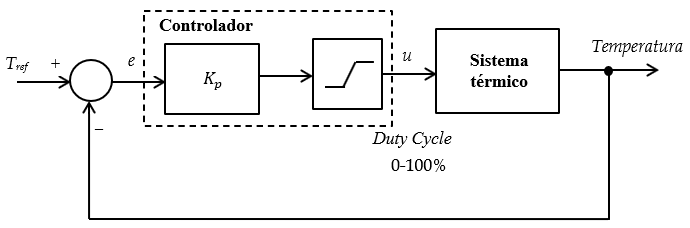

Para as experiências com o controlador **P** utilize o sistema térmico **1** (`Q1`) do TCLab. Neste caso, efetue o controlo do sistema durante um tempo de $t_{final}=600$ s. 

#### Ponto 1
Obtenha o comportamento do sistema **TCLab** com um controlador **P** para o seguinte conjunto de quatro valores arbitrários para o ganho proporcional: $K_p=1,5,10,20$.

**a)**

Apresente as curvas de resposta da temperatura do sistema térmico e dos correspondentes sinais de controlo ($u$, em termos do *Duty Cycle*) para os vários valores do ganho $K_p$ considerados. Mostre também um gráfico do erro $e$ ao longo do tempo entre a temperatura de referência $T_{ref}$ e a temperatura atual do sistema.

### Carregar todas as bibliotecas necessárias

In [3]:
import numpy as np
import time 
import matplotlib.pyplot as plt
import tclab

### Obtenção dos dados, visualização e guardar em ficheiro para os valores de $K_P$ considerados

In [2]:
# Conectar ao TCLab
lab = tclab.TCLab()

# parâmetros da experiência
Ts = 1                      # período de amostragem
tf = 600.0                  # tempo final (10 minutos)
n = int(np.round(tf/Ts+1))  # número de amostras
t = np.linspace(0,n-1,n)*Ts # tempo

T1 = np.zeros(n)             # temperatura (ºC)
u = np.zeros(n)              # sinal de controlo
Tref = np.ones(n)*50         # temperatura de referência = 50 ºC
e = np.zeros(n)              # erro

# ganho Kp
Kp = 20     ### AJUSTAR VALOR DO GANHO ###

print('Inicio...')
print(' t (s)  Tref   u     T1 (ºC)    e')
for i in range(n):
    tic1 = time.time()
    
    # Ler temperatura 
    T1[i] = lab.T1
    
    #----------------------------------------------
    # COMPLETE O CÓDIGO
    #----------------------------------------------
    # calcular erro
    e[i] = Tref[i] - T1[i]
    
    # calcular ação P
    u[i] = Kp * e[i]
    #----------------------------------------------
    
    # saturação: 0-100%
    u[i] = max(0.0, min(100.0, u[i])) 
    
    # aplicar saida do cont. P ao sistema térmico
    lab.Q1(u[i])
    
    # Imprime dados
    if i%10 == 0:
        print(f'{t[i]:6.2f},{Tref[i]:6.2f},{u[i]:6.2f},{T1[i]:6.2f},{e[i]:6.2f}')
    tic2 = time.time()
    t1 = tic2 - tic1
    time.sleep(max(0,Ts-t1))

# Desligar sistema
lab.Q1(0)
print('Fim...')
lab.close()

# Gráficos 
plt.figure(figsize=(10,7))
# Tref, T1
ax = plt.subplot(2,1,1) 
ax.grid()
plt.plot(t,Tref,'k-',label=r'$Tref$')
plt.plot(t,T1,'r.',label=r'$T_1$')
plt.ylabel('Temperatura ($^oC$)')
plt.legend(loc='best')
# u
ax = plt.subplot(2,1,2)
ax.grid()
plt.plot(t,u,'b-',label=r'$u$')
plt.ylabel('Controlo (%)')
plt.xlabel('Tempo (s)')
plt.legend(loc='best')
plt.show()

# guardar em ficheiro ### AJUSTAR NOME DO FICHEIRO E VARIÁVEIS ###
dados = np.vstack((t, Tref, u, T1, e)).T 
np.savetxt('controlo_Kp_20.txt', dados, delimiter=',',\
           header='t,Tref,u,T1,e',comments='')

TCLab version 1.0.0
--- Serial Ports ---


RuntimeError: No Arduino device found.

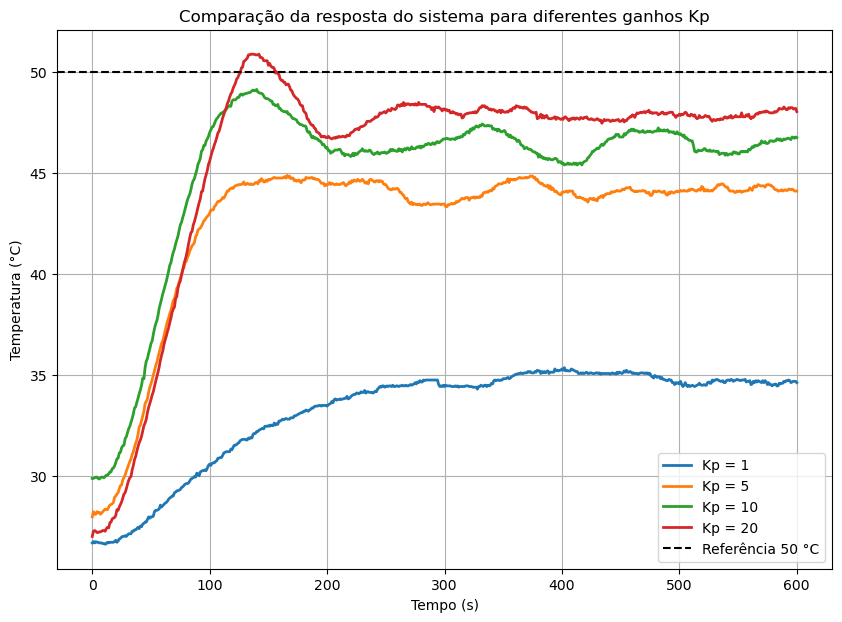

In [5]:
# Coloque o código AQUI
arquivos = [
    ('controlo_Kp_1.txt', 1),
    ('controlo_Kp_5.txt', 5),
    ('controlo_Kp_10.txt', 10),
    ('controlo_Kp_20.txt', 20)
]

plt.figure(figsize=(10,7))

for nome, Kp in arquivos:
    dados = np.genfromtxt(nome, delimiter=',', names=True)
    plt.plot(dados['t'], dados['T1'], label=f"Kp = {Kp}", linewidth=2)

plt.axhline(50, color='k', linestyle='--', linewidth=1.5, label='Referência 50 °C')

plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.title("Comparação da resposta do sistema para diferentes ganhos Kp")
plt.grid(True)
plt.legend()
plt.show()


**b)**

As curvas de temperatura apresentam o comportamento desejado? Refira-se tanto ao comportamento transitório como ao do regime permanente. Justifique considerando os vários valores do ganho $K_p$ utilizados e na análise dos seguintes parâmetros:
* Valores do erro em regime permanente do sistema, $e_{ss}$
* Sinais de controlo, $u$ 

In [ ]:
# Insira os comentários AQUI
Tendo em consideração o gráfico em cima podemos observar com clareza que os valores finais/parte final dos quatro gráficos estão de acordo com o
espetável, ou seja, podemos ver que a medida que é aumentado o Kp mais proximo de cinquaenta graus fica o gráfico. Já na parte incial devido ao facto de
a temperatura incial não ter sido exatamente a mesma os gráficos acabam por se cruzar mas dá para ver bem os overshot's de cada gráfico e constatar, como
esperado que quanto maior o Kp maior será o overshot.



#### Ponto 2
Simule o sistema de controlo em malha fechada da temperatura usando um o controlador **P**, $C(s)=K_p$, conforme representado na figura seguinte. 

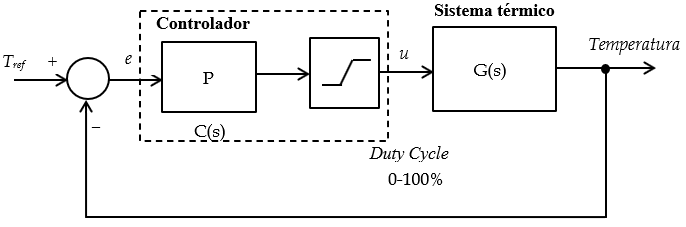

Para isso, utilize o modelo de primeira ordem conm atraso identificado no Guião do Trabalho No. 1, com a função de transferência:

$$ G(s)=\frac{Y(s)}{U(s)}=\frac{Ke^{-\tau_Ds}}{τs+1} \tag{4}$$

e os parâmetros $(K,\tau, \tau_D)$ identificados do sistema TCLab (`Q1`). 

A correspondente equação diferencial é dada por:

$$ \tau \frac{dy(t)}{dt} + y(t) = K u(t-\tau_D) \tag{5}$$ 

**a)**

Apresente as curvas de resposta da temperatura do sistema simulado e dos correspondentes sinais de controlo ($u$) para os ganhos do controlador **P** considerados no **Ponto 1**: $K_p=1,5,10,20$. Mostre também um gráfico do erro ao longo do tempo entre a referência de temperatura $T_{ref}$ e a temperatura simulada do sistema.

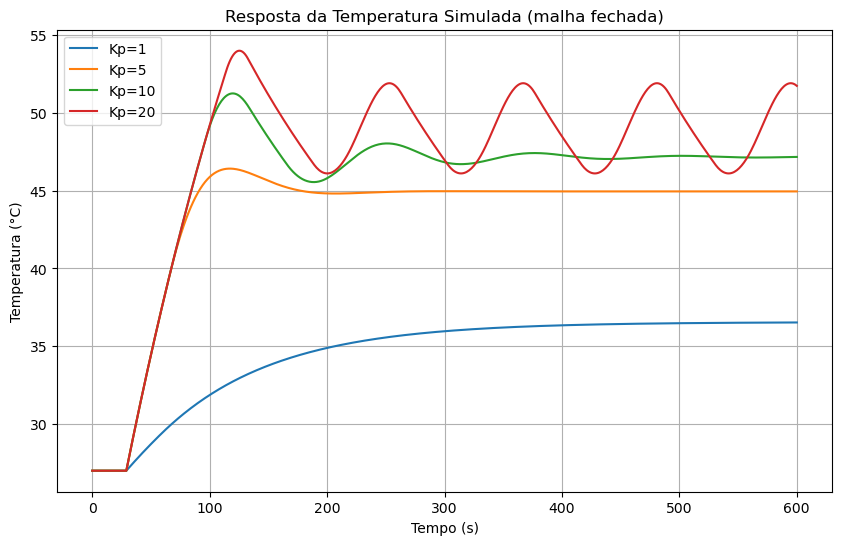

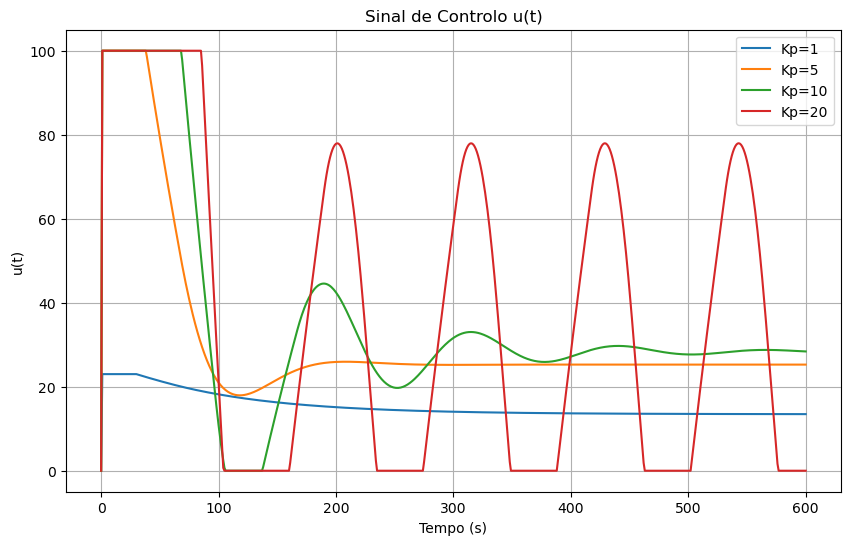

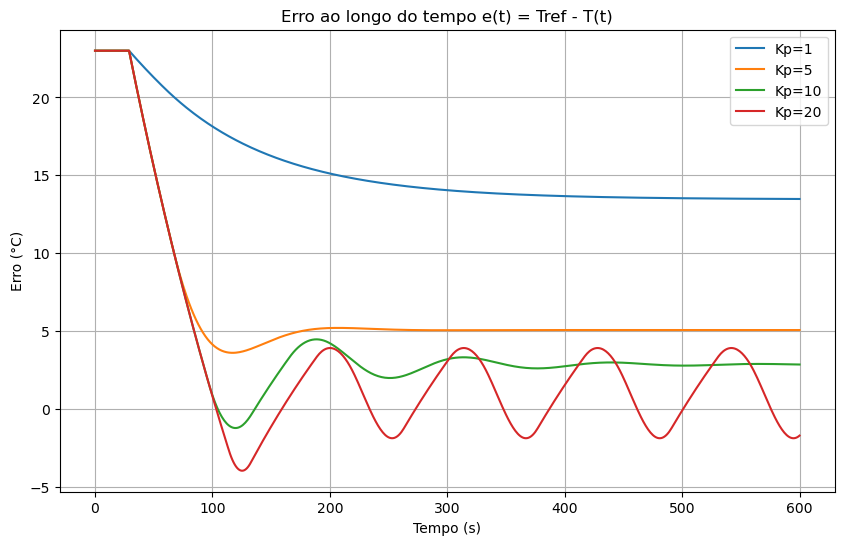

In [11]:
K = 0.7103       # ganho do sistema
Tau = 189.9718   # constante de tempo (s)
TauD = 28.9725   # atraso (s)
T0 = 27.0        # temperatura inicial (°C)
Tref = 50.0      # referência (°C)

Kp_list = [1, 5, 10, 20]  # ganhos P
t_max = 600         # simular 600 s, como os dados reais
dt = 1.0            # passo de tempo (s)
t = np.arange(0.0, t_max + dt, dt)
n_steps = len(t)

def simular_P(Kp, u_min = 0.0, u_max = 100.0):
    y_dev = np.zeros(n_steps)
    y = np.zeros(n_steps)
    u = np.zeros(n_steps)
    e = np.zeros(n_steps)

    y_dev[0] = 0.0
    y[0] = T0
    e[0] = Tref - y[0]
    u[0] = np.clip(u[0], u_min, u_max)
    
    buffer_size = int(round(TauD/dt))
    
    for k in range(1, n_steps):
        e[k] = Tref - y[k-1]
        u[k] = np.clip(Kp * e[k], u_min, u_max)
        
        # adicionar o controle atrasado
        if buffer_size > 0 and k - buffer_size >= 0:
            u_delayed = u[k - buffer_size]
        else:
            u_delayed = u[0]  # antes do início do buffer
        
        dy = ( -y_dev[k-1] + K * u_delayed ) * dt / Tau
        y_dev[k] = y_dev[k-1] + dy
        y[k]= T0 + y_dev[k]
    
    # erro final
    e = Tref - y
    return y, u, e

# Temperatura
plt.figure(figsize=(10,6))
for Kp in Kp_list:
    y, u, e = simular_P(Kp)
    plt.plot(t, y, label=f"Kp={Kp}")
plt.title("Resposta da Temperatura Simulada (malha fechada)")
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.show()

# Sinal de controlo u(t)
plt.figure(figsize=(10,6))
for Kp in Kp_list:
    y, u, e = simular_P(Kp)
    plt.plot(t, u, label=f"Kp={Kp}")
plt.title("Sinal de Controlo u(t)")
plt.xlabel("Tempo (s)")
plt.ylabel("u(t)")
plt.legend()
plt.grid(True)
plt.show()

# Erro e(t)
plt.figure(figsize=(10,6))
for Kp in Kp_list:
    y, u, e = simular_P(Kp)
    plt.plot(t, e, label=f"Kp={Kp}")
plt.title("Erro ao longo do tempo e(t) = Tref - T(t)")
plt.xlabel("Tempo (s)")
plt.ylabel("Erro (°C)")
plt.legend()
plt.grid(True)
plt.show()

**b)**

Compare as curvas de simulação (temperatura e sinal de controlo) obtidas em **a)** com as respostas experimentais do **Ponto 1**. Comente eventuais diferenças existentes entre ambas as respostas. 

In [ ]:
# Coloque o código/comentários AQUI




### 2.2	Controlo PI

Adicionando o controlo $P$ à integral do erro ($I$) obtemos o chamado controlo Proporcional e Integral ou simplesmente controlo **PI**. Este pode ser obtido através da equação (2) colocando o parâmetro $K_d=0$, resultando:

$$ u(t)=K_p\left(e(t) + \frac{1}{T_i}\int_{0}^{t}e(\tau) d\tau \right) =  K_p e(t) + \frac{K_p}{T_i}\int_{0}^{t}e(\tau) d\tau = P(t) + I(t) $$

Um possível algoritmo de controlo do controlador **PI** é dado por:

$$ P(k) = K_p e(k)$$
$$ v(k) = P(k) + I(k)$$
$$ u(k) = sat(v(k),u_{min},u_{max})$$
$$I(k+1) = I(k) + \frac{K_P T}{T_i}  e(k)$$


A figura seguinte apresenta o diagrama de blocos do sistema em malha fechada com um controlador **PI**.

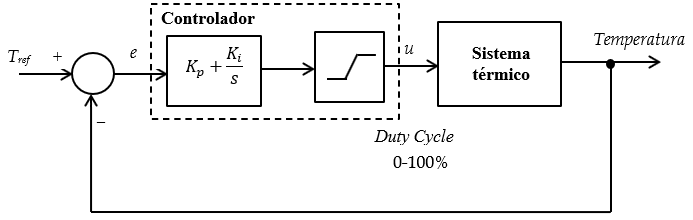




Para as experiências com o controlador **PI** utilize o sistema térmico **1** (`Q1`) do TCLab. Neste caso, efetue o controlo do sistema durante um tempo de $t_{final}=600$ s. 


#### Ponto 1
Obtenha o comportamento do sistema TCLab com um controlador **PI** para $K_p=5$  e $T_i=50,100,200$.

**a)**

Para cada valor da constante $T_i$ , apresente num gráfico a curva de resposta da temperatura do sistema térmico e num outro gráfico os correspondentes sinais de controlo $(u)$, valor da componente proporcional $(P)$ e valor da componente integrativa $(I)$. Explique os valores de cada um dos termos à medida que a temperatura sobe e estabiliza em torno da referência desejada. 

TCLab version 1.0.0
Arduino Leonardo connected on port COM7 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Inicio...
 t (s)  Tref   u     T1 (ºC)    e
  0.00, 50.00,100.00, 30.66, 19.34
 10.00, 50.00,100.00, 31.53, 18.47
 20.00, 50.00,100.00, 33.02, 16.98
 30.00, 50.00,100.00, 34.85, 15.15
 40.00, 50.00,100.00, 37.11, 12.89
 50.00, 50.00,100.00, 39.59, 10.41
 60.00, 50.00,100.00, 41.91,  8.09
 70.00, 50.00,100.00, 44.30,  5.70
 80.00, 50.00,100.00, 46.91,  3.09
 90.00, 50.00,100.00, 49.26,  0.74
100.00, 50.00,100.00, 51.55, -1.55
110.00, 50.00,100.00, 53.67, -3.67
120.00, 50.00, 77.77, 55.51, -5.51
130.00, 50.00, 22.54, 57.60, -7.60
140.00, 50.00,  0.00, 58.67, -8.67
150.00, 50.00,  0.00, 59.34, -9.34
160.00, 50.00,  0.00, 58.89, -8.89
170.00, 50.00,  0.00, 57.96, -7.96
180.00, 50.00,  0.00, 56.96, -6.96
190.00, 50.00,  0.00, 55.67, -5.67
200.00, 50.00,  0.00, 53.87, -3.87
210.00, 50.00, 13.00, 52.45, -2.45
220.00, 50.00, 33.08, 51.26, -1.26
230.00, 50.00, 55.06, 50.10, -

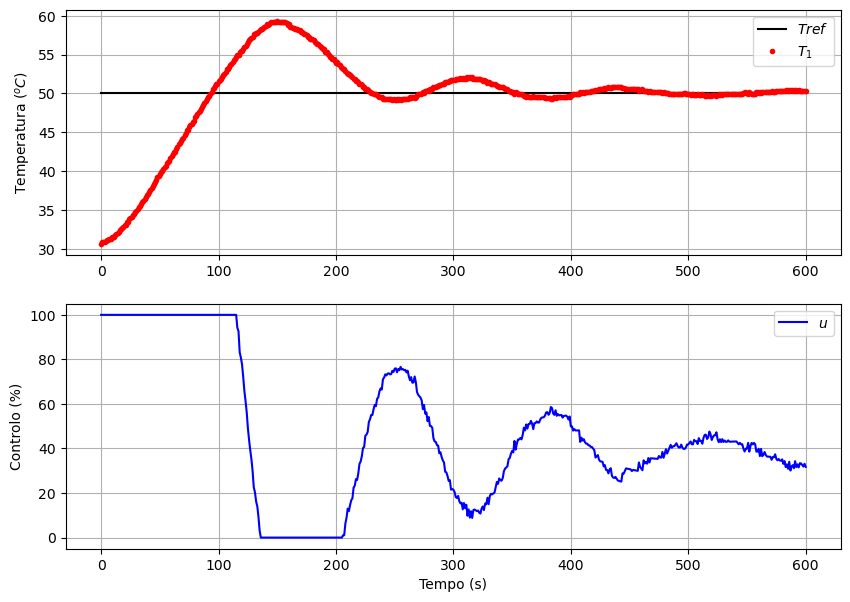

In [3]:
# Conectar ao TCLab
lab = tclab.TCLab()

# parâmetros da experiência
Ts = 1                      # período de amostragem
tf = 600.0                  # tempo final (10 minutos)
n = int(np.round(tf/Ts+1))  # número de amostras
t = np.linspace(0,n-1,n)*Ts # tempo

T1 = np.zeros(n)             # temperatura (ºC)
u = np.zeros(n)              # sinal de controlo
Tref = np.ones(n)*50         # temperatura de referência = 50 ºC
e = np.zeros(n)              # erro
P = np.zeros(n)
Ivec = np.zeros(n)
v = np.zeros(n)

# ganho Kp
Kp = 20     
Ti = 100       ### AJUSTAR VALOR ###
I = 0.0

print('Inicio...')
print(' t (s)  Tref   u     T1 (ºC)    e')
for i in range(n):
    tic1 = time.time()
    
    # Ler temperatura 
    T1[i] = lab.T1
    
    #----------------------------------------------
    # COMPLETE O CÓDIGO
    #----------------------------------------------
    # calcular erro
    e[i] = Tref[i] - T1[i]
    
    # calcular ação P
    P[i] = Kp * e[i]

    # ação integral
    I = I + (Kp * Ts / Ti) * e[i]

    # soma P + I
    v[i] = P[i] + I
    
    #----------------------------------------------
    
    # saturação: 0-100%
    u[i] = max(0.0, min(100.0, v[i])) 
    
    # aplicar saida do cont. P ao sistema térmico
    lab.Q1(u[i])
    
    # Imprime dados
    if i%10 == 0:
        print(f'{t[i]:6.2f},{Tref[i]:6.2f},{u[i]:6.2f},{T1[i]:6.2f},{e[i]:6.2f}')
    tic2 = time.time()
    t1 = tic2 - tic1
    time.sleep(max(0,Ts-t1))

# Desligar sistema
lab.Q1(0)
print('Fim...')
lab.close()

# Gráficos 
plt.figure(figsize=(10,7))
# Tref, T1
ax = plt.subplot(2,1,1) 
ax.grid()
plt.plot(t,Tref,'k-',label=r'$Tref$')
plt.plot(t,T1,'r.',label=r'$T_1$')
plt.ylabel('Temperatura ($^oC$)')
plt.legend(loc='best')
# u
ax = plt.subplot(2,1,2)
ax.grid()
plt.plot(t,u,'b-',label=r'$u$')
plt.ylabel('Controlo (%)')
plt.xlabel('Tempo (s)')
plt.legend(loc='best')
plt.show()

# guardar em ficheiro ### AJUSTAR NOME DO FICHEIRO E VARIÁVEIS ###
dados = np.vstack((t, Tref, u, T1, e)).T 
np.savetxt('controlo_Ti_100.txt', dados, delimiter=',',\
           header='t,Tref,u,T1,e',comments='')

**b)**

Esboce num gráfico as curvas de temperatura do sistema térmico e num outro gráfico os correspondentes sinais de controlo ($u$) para os diferentes valores da constante $T_i$ considerados. Explique o fenómeno que leva a saída a apresentar um "overshoot".

In [ ]:
# Coloque o código/comentários AQUI



**c)**	

Indique quais as consequências de adicionar um controlo integral ao sistema.

In [ ]:
# Insira os comentários AQUI




#### Ponto 2
Simule o sistema de controlo em malha fechada da temperatura usando um controlador **PI**, $C(s)=K_p+K_i/s$, conforme representado na figura seguinte. Para isso, utilize o modelo de primeira ordem com atraso identificado no Guião do Trabalho No. 1, com a função de transferência:

$$ G(s)=\frac{Y(s)}{U(s)}=\frac{Ke^{-\tau_Ds}}{τs+1} $$

e os parâmetros $(K, \tau, \tau_D)$ identificados do sistema TCLab (`Q1`). 

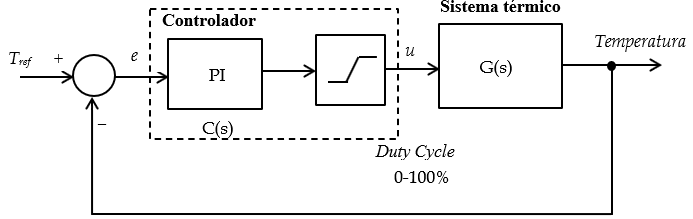

A correspondente equação diferencial é dada por:

$$ \tau \frac{dy(t)}{dt} + y(t) = K u(t-\tau_D)$$ 

**a)**

Apresente as curvas de resposta da temperatura do sistema simulado e dos correspondentes sinais de controlo ($u$) para os mesmos valores da constante  $T_i$  do controlador **PI** considerados no **Ponto 1**: $T_i=50,100,200$,  mantendo o ganho $K_p=5$.

In [ ]:
# Coloque o código/comentários AQUI




**b)**

Compare as curvas de simulação (temperatura e sinal de controlo) obtidas em **a)** com as respostas experimentais do **Ponto 1**. Comente eventuais diferenças existentes entre ambas as respostas. 

In [ ]:
# Coloque o código/comentários AQUI




#### Ponto 3
Faça a sintonia do controlador **PI** aplicando o método de Ziegler-Nichols 
(Z-N) em malha aberta. Para isso, utilize os parâmetros $(K,τ,τ_d)$ identificados do sistema TCLab (`Q1`) referente ao modelo de primeira ordem com atraso (função de transferência (4)) identificado no Guião do Trabalho No. 1.

**a)**

Obtenha os parâmetros $(K_p, T_i)$ do controlador **PI**.

In [ ]:
# Coloque o código AQUI





**b)**

Apresente a curva de resposta da temperatura do sistema térmico e do correspondente sinal de controlo ($u$) para as constantes de sintonia obtidas em **a)**.

In [ ]:
# Coloque o código AQUI




**c)**

Comente o desempenho do controlador usando as constantes calculadas.

In [ ]:
# Insira os comentários AQUI




#### Ponto 4
Faça a sintonia do controlador **PI** aplicando o método IMC. Para isso, utilize os parâmetros $(K,τ,τ_d)$   identificados do sistema TCLab (`Q1`) referente ao modelo de primeira ordem com atraso (função de transferência (4)) identificado no Guião do Trabalho No. 1.

**a)**

Obtenha os parâmetros $(K_p, T_i)$ do controlador **PI** para os valores de 
$τ_C=τ⁄10$, $τ_C=τ⁄5$  e $τ_C=τ⁄2$.

In [ ]:
# Coloque o código AQUI





**b)**

Apresente num gráfico as curvas de resposta da temperatura do sistema térmico e num outro gráfico os correspondentes sinais de controlo ($u$) para os parâmetros de sintonia calculados em **a)**.

In [ ]:
# Coloque o código AQUI





**c)**

Comente o desempenho do controlador usando as referidas sintonias.

In [ ]:
# Insira os comentários AQUI




#### Ponto 5
Existem diversos métodos para reduzir o efeito do *windup* verificado nas experiências anteriores. A figura seguinte apresenta um possível diagrama de um sistema em malha fechada com um controlador **PI** e um esquema
 *anti-windup*.

 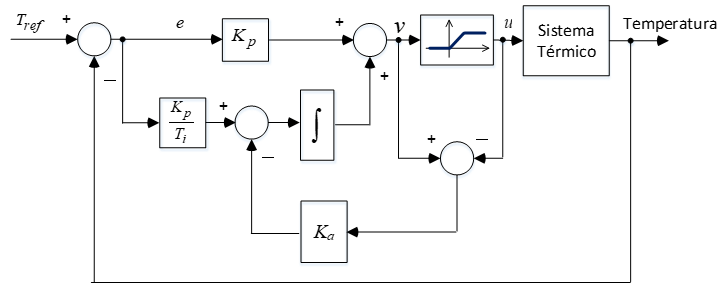

 O algoritmo do controlador **PI** com o esquema *anti-windup* é dado pelas seguintes equações:

$$ P(k) = K_p e(k)$$
$$ v(k) = P(k) + I(k)$$
$$ u(k) = sat(v(k),u_{min},u_{max})$$
$$I(k+1) = I(k) + \frac{K_P T}{T_i} e(k) + TK_a \left(u(k) - v(k)\right)$$
 

Para a realização das experiências, considere os parâmetros do controlador **PI** obtidos no **Ponto 3a)** usando o método de Ziegler-Nichols em malha aberta.

**a)**

Obtenha o comportamento do sistema TCLab para os valores do ganho *anti-windup* $K_a = 0.02, 0.1, 0.2$. Para cada valor do ganho $K_a$, apresente num gráfico a curva de resposta da temperatura do sistema térmico e num outro gráfico os correspondentes sinal de controlo ($u$), valor da componente proporcional ($P$) e valor da componente integrativa ($I$). Explique a evolução de cada um dos sinais do sistema.

In [ ]:
# Coloque o código/comentários AQUI





**b)**

Compare os resultados com o esquema *anti-windup* e sem o esquema *anti-windup*. Esboce num gráfico as curvas de temperatura do sistema térmico e num outro gráfico os sinais de controlo ($u$) aplicados ao sistema. Comente os resultados obtidos.

In [ ]:
# Coloque o código/comentários AQUI


